# Prepare data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [ ]:
import pandas as pd
df_train = pd.read_pickle("/content/drive/MyDrive/Mine/hw-cnn-wafer-classification/data/train.pkl")
df_test = pd.read_pickle("/content/drive/MyDrive/Mine/hw-cnn-wafer-classification/data/test_gt.pkl")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train

waferMap   failureType
0       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2,...      [[none]]
1       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      [[none]]
2       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      [[none]]
3       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,...      [[none]]
4       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1,...      [[none]]
...                                                   ...           ...
112289  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,...    [[Center]]
112290  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1,...  [[Edge-Loc]]
112291  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      [[none]]
112292  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...      [[none]]
112293  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1,...      [[none]]

[112294 rows x 2 columns]

In [ ]:
df_test

waferMap failureType
0      [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2,...    [[none]]
1      [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1,...    [[none]]
2      [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 2,...    [[none]]
3      [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,...    [[none]]
4      [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...    [[none]]
...                                                  ...         ...
30816  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,...    [[none]]
30817  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...    [[none]]
30818  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,...    [[none]]
30819  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1,...    [[none]]
30820  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2,...    [[none]]

[30821 rows x 2 columns]

In [ ]:
def find_dim(x):
    dim0=np.size(x,axis=0)
    dim1=np.size(x,axis=1)
    return dim0,dim1
df_train['waferMapDim']=df_train.waferMap.apply(find_dim)
df_test['waferMapDim']=df_test.waferMap.apply(find_dim)

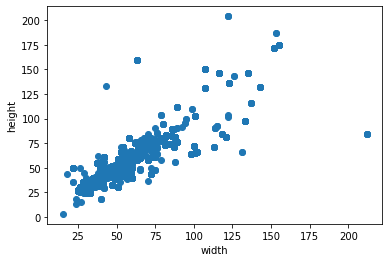

In [ ]:
shapes = df_train.waferMapDim.values
shapes = [[width, height] for (width, height) in shapes]
shapes = np.array(shapes)
plt.scatter(shapes[:, 0], shapes[:, 1])
plt.xlabel('width')
plt.ylabel('height')
plt.show()

In [ ]:
df_train['failureNum']=df_train.failureType
df_test['failureNum']=df_test.failureType
mapping_type={'Center':0, 'Donut':1, 'Edge-Loc':2, 'Edge-Ring':3, 'Loc':4,
              'Random':5, 'Scratch':6, 'Near-full':7, 'none':8}
df_train=df_train.replace({'failureNum':mapping_type})
df_test=df_test.replace({'failureNum':mapping_type})

[0 1 2 3 4 5 6 7 8]
[ 2805   371  3334  6281  2336   569   767    94 95737]
[2.49790728e-02 3.30382745e-03 2.96899211e-02 5.59335316e-02
 2.08025362e-02 5.06705612e-03 6.83028479e-03 8.37088357e-04
 8.52556682e-01]


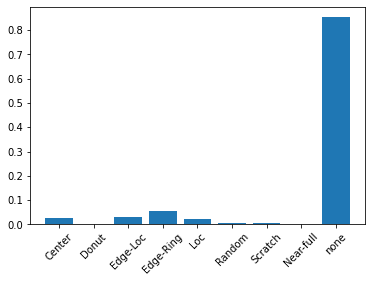

In [ ]:
uni_pattern = np.unique(df_train.failureNum, return_counts=True)
idxs = uni_pattern[0]
print(uni_pattern[1])
ratios = uni_pattern[1]/df_train.shape[0]
print(ratios)
labels = list(mapping_type.keys())

ax = plt.subplot()
plt.bar(idxs, ratios, align='center')
plt.xticks(uni_pattern[0], labels, rotation=45)
plt.show()

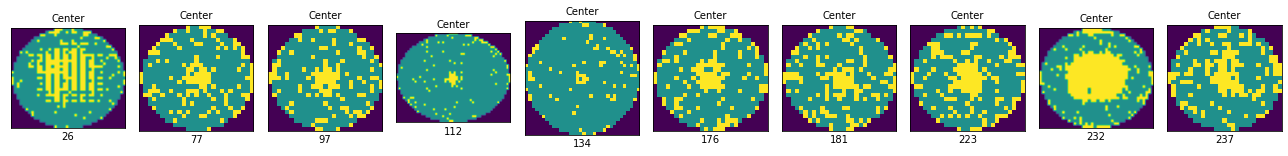

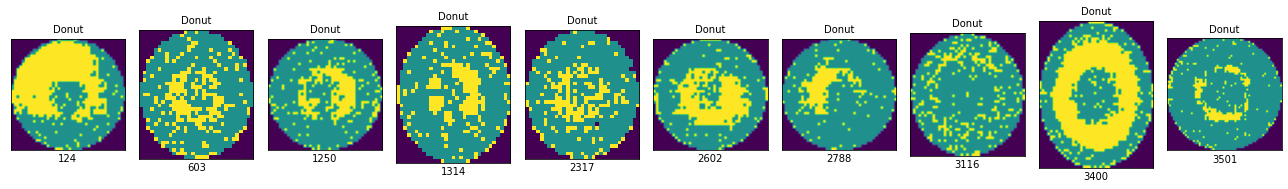

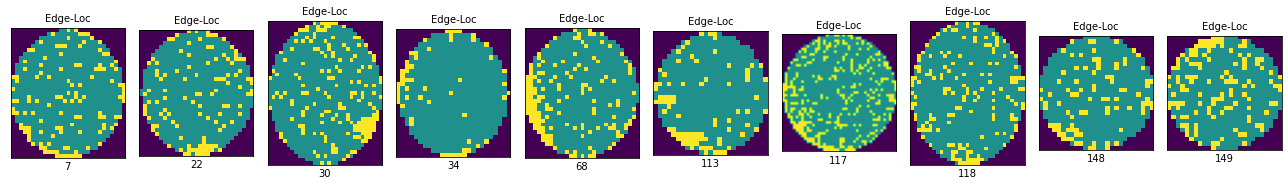

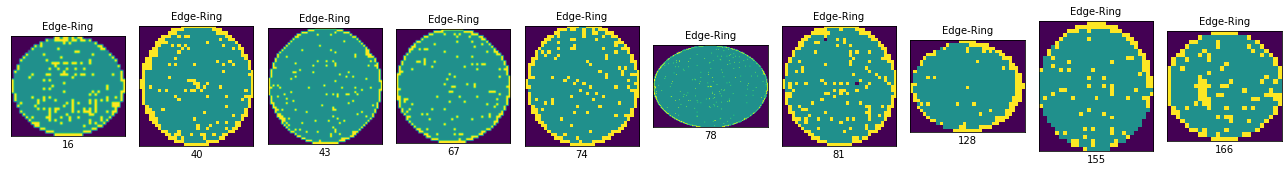

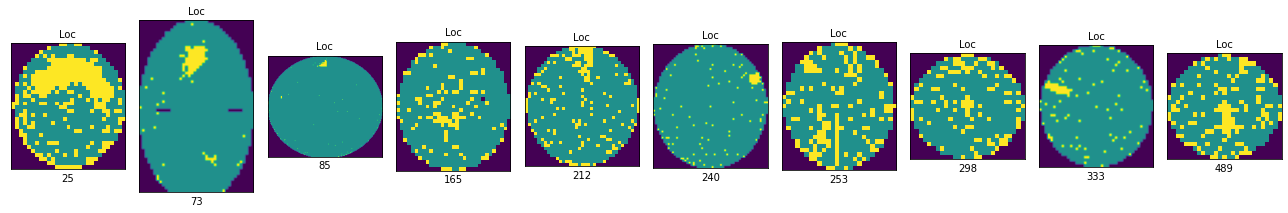

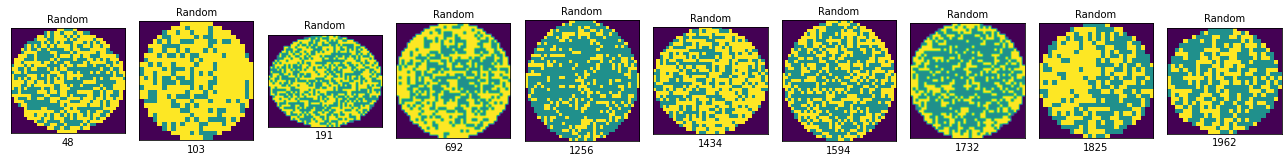

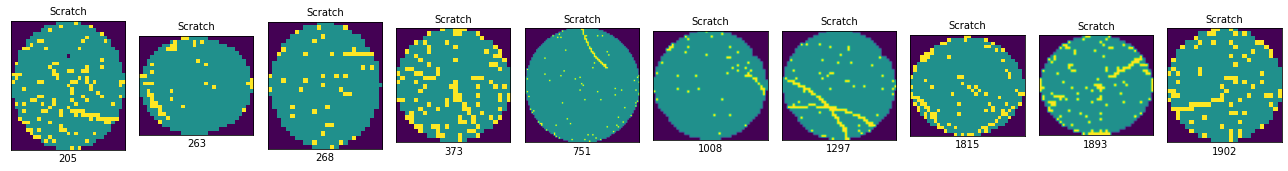

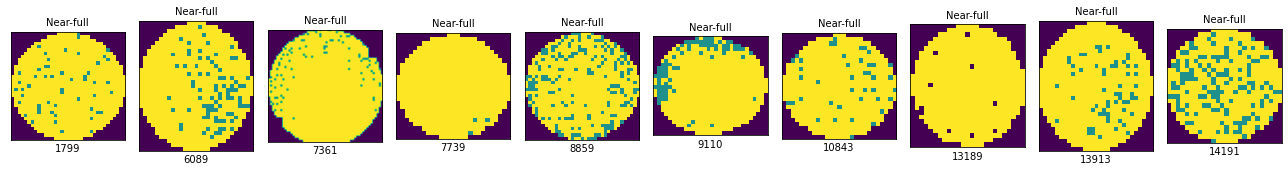

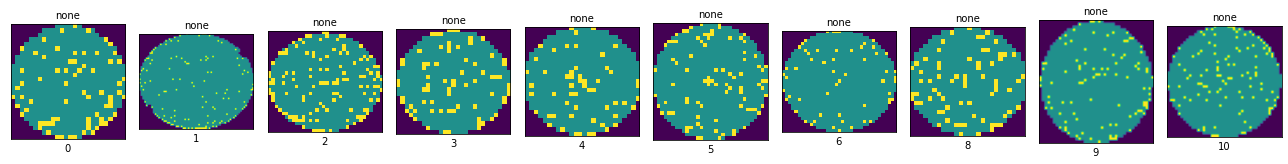

In [ ]:
label_name = list(mapping_type.keys())
label_idx = list(mapping_type.values())

for k in label_idx:
    fig, ax = plt.subplots(nrows = 1, ncols = 10, figsize=(18, 12))
    ax = ax.ravel(order='C')
    for j in [k]:
        img = df_train.waferMap[df_train.failureType==label_name[j]]
        for i in range(10):
            ax[i].imshow(img[img.index[i]])
            ax[i].set_title(df_train.failureType[img.index[i]][0][0], fontsize=10)
            ax[i].set_xlabel(img.index[i], fontsize=10)
            ax[i].set_xticks([])
            ax[i].set_yticks([])
    plt.tight_layout()
    plt.show() 

# Preprocess data

In [ ]:
import cv2
def map_resize(x, size=(16, 16)):
    out = cv2.resize(x, dsize=size, interpolation=cv2.INTER_LINEAR)
    return np.array(out).reshape(size[0], size[1], 1)

In [ ]:
df_train['resizedMap'] = df_train.waferMap.apply(map_resize)
df_test['resizedMap'] = df_test.waferMap.apply(map_resize)

# Prepare a model

In [ ]:
import tensorflow
from tensorflow.keras import Sequential, Input
from tensorflow.keras import layers
tensorflow.keras.backend.clear_session()

model = Sequential()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 8)         208       
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        3216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 16)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 9)                 9225      
                                                                 
Total params: 12,649
Trainable params: 12,649
Non-trainable params: 0
____________________________________________________

In [ ]:
def softmax(a) :
    
    return y

#model = load_model('model', custom_objects={'loss': my_loss(additional arguments)})
def softmax_CE(ratio):
    def loss(y_true, y_pred):

    return loss

model.compile()

In [ ]:
train_x = np.array(list(df_train['resizedMap'].to_numpy()), dtype=np.float32)
train_y = df_train['failureNum'].to_numpy()
test_x = np.array(list(df_test['resizedMap'].to_numpy()), dtype=np.float32)
test_y = df_test['failureNum'].to_numpy()

train_y = tf.stop_gradient(tf.one_hot(train_y, len(labels)))

In [ ]:
model.fit(train_x, train_y, batch_size=1024, epochs=20, shuffle=True, validation_split =0.2)

Train on 89835 samples, validate on 22459 samples
Epoch 1/20
89835/89835 [==============================] - 1s 15us/sample - loss: 0.0170 - accuracy: 0.9162 - val_loss: 0.0186 - val_accuracy: 0.9270
Epoch 2/20
89835/89835 [==============================] - 1s 8us/sample - loss: 0.0169 - accuracy: 0.9167 - val_loss: 0.0186 - val_accuracy: 0.9257
Epoch 3/20
89835/89835 [==============================] - 1s 8us/sample - loss: 0.0167 - accuracy: 0.9176 - val_loss: 0.0182 - val_accuracy: 0.9263
Epoch 4/20
89835/89835 [==============================] - 1s 9us/sample - loss: 0.0166 - accuracy: 0.9171 - val_loss: 0.0191 - val_accuracy: 0.9182
Epoch 5/20
89835/89835 [==============================] - 1s 8us/sample - loss: 0.0164 - accuracy: 0.9185 - val_loss: 0.0187 - val_accuracy: 0.9043
Epoch 6/20
89835/89835 [==============================] - 1s 8us/sample - loss: 0.0162 - accuracy: 0.9183 - val_loss: 0.0181 - val_accuracy: 0.9296
Epoch 7/20
89835/89835 [==============================] - 1s 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(test_x)
y_pred = tf.argmax(y_pred, axis=1).numpy()

In [ ]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.79       764
           1       0.61      0.79      0.69        80
           2       0.48      0.58      0.52       981
           3       0.88      0.92      0.90      1740
           4       0.32      0.41      0.36       648
           5       0.77      0.66      0.71       144
           6       0.12      0.02      0.04       222
           7       0.95      0.72      0.82        25
           8       0.97      0.95      0.96     26217

    accuracy                           0.92     30821
   macro avg       0.65      0.65      0.64     30821
weighted avg       0.92      0.92      0.92     30821



In [ ]:
print(confusion_matrix(test_y, y_pred, labels=range(9)))

[[  638     6     2     1    19     0     4     0    94]
 [    2    63     0     0    11     3     0     0     1]
 [   12     1   566    39    61     5     4     0   293]
 [    4     0    61  1608     5     4     0     0    58]
 [   36    19    65     4   266     2     6     1   249]
 [    7     1    18     3    19    95     1     0     0]
 [    3     0    16     3    37     1     5     0   157]
 [    1     0     2     0     3     1     0    18     0]
 [  139    13   458   171   418    13    21     0 24984]]
